###1. Choose a Python environment and install it on your computer (PyCharm or Google Colab).
###2. Install the following libraries: numpy, matplotlib, pandas, tensorflow, sklearn, and pytorch.


In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install torch
!pip install torchvision
!pip install seaborn
!pip install numpy matplotlib seaborn scikit-learn



  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 3. Loading the MNIST Dataset
The MNIST database is a large collection of handwritten digits used for training and testing in machine learning. It comprises 60,000 training examples and 10,000 test examples derived from a larger NIST database. These images originally written by U.S. Census Bureau employees and high school students were size-normalized to a 20x20 pixel box and centered in a 28x28 pixel image using anti-aliasing techniques to maintain their aspect ratio, resulting in images with grey levels.

11490434/11490434 [==============================] - 0s 0us/step
Number of training images: 60000
Number of testing images: 10000
Image shape: (28, 28)


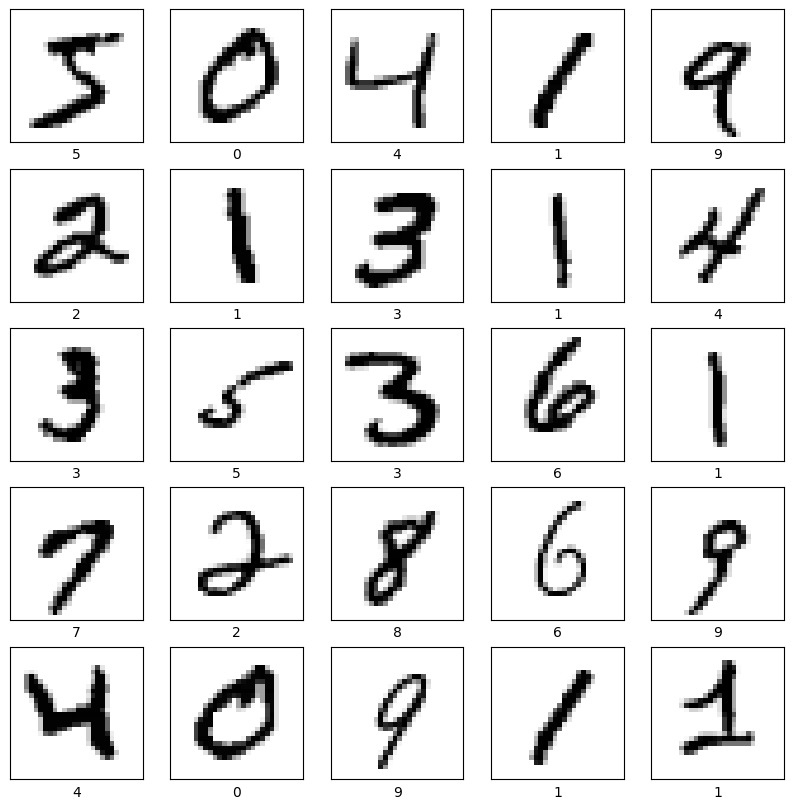

In [3]:
##3. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display basic statistics
print("Number of training images:", x_train.shape[0])
print("Number of testing images:", x_test.shape[0])
print("Image shape:", x_train[0].shape)

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display a sample of training images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### 4.  simple statistics of this dataset
number of images, their distribution, average
number of white pixels in each class and its standard deviation, the number of common
pixels in each class that are non-white.

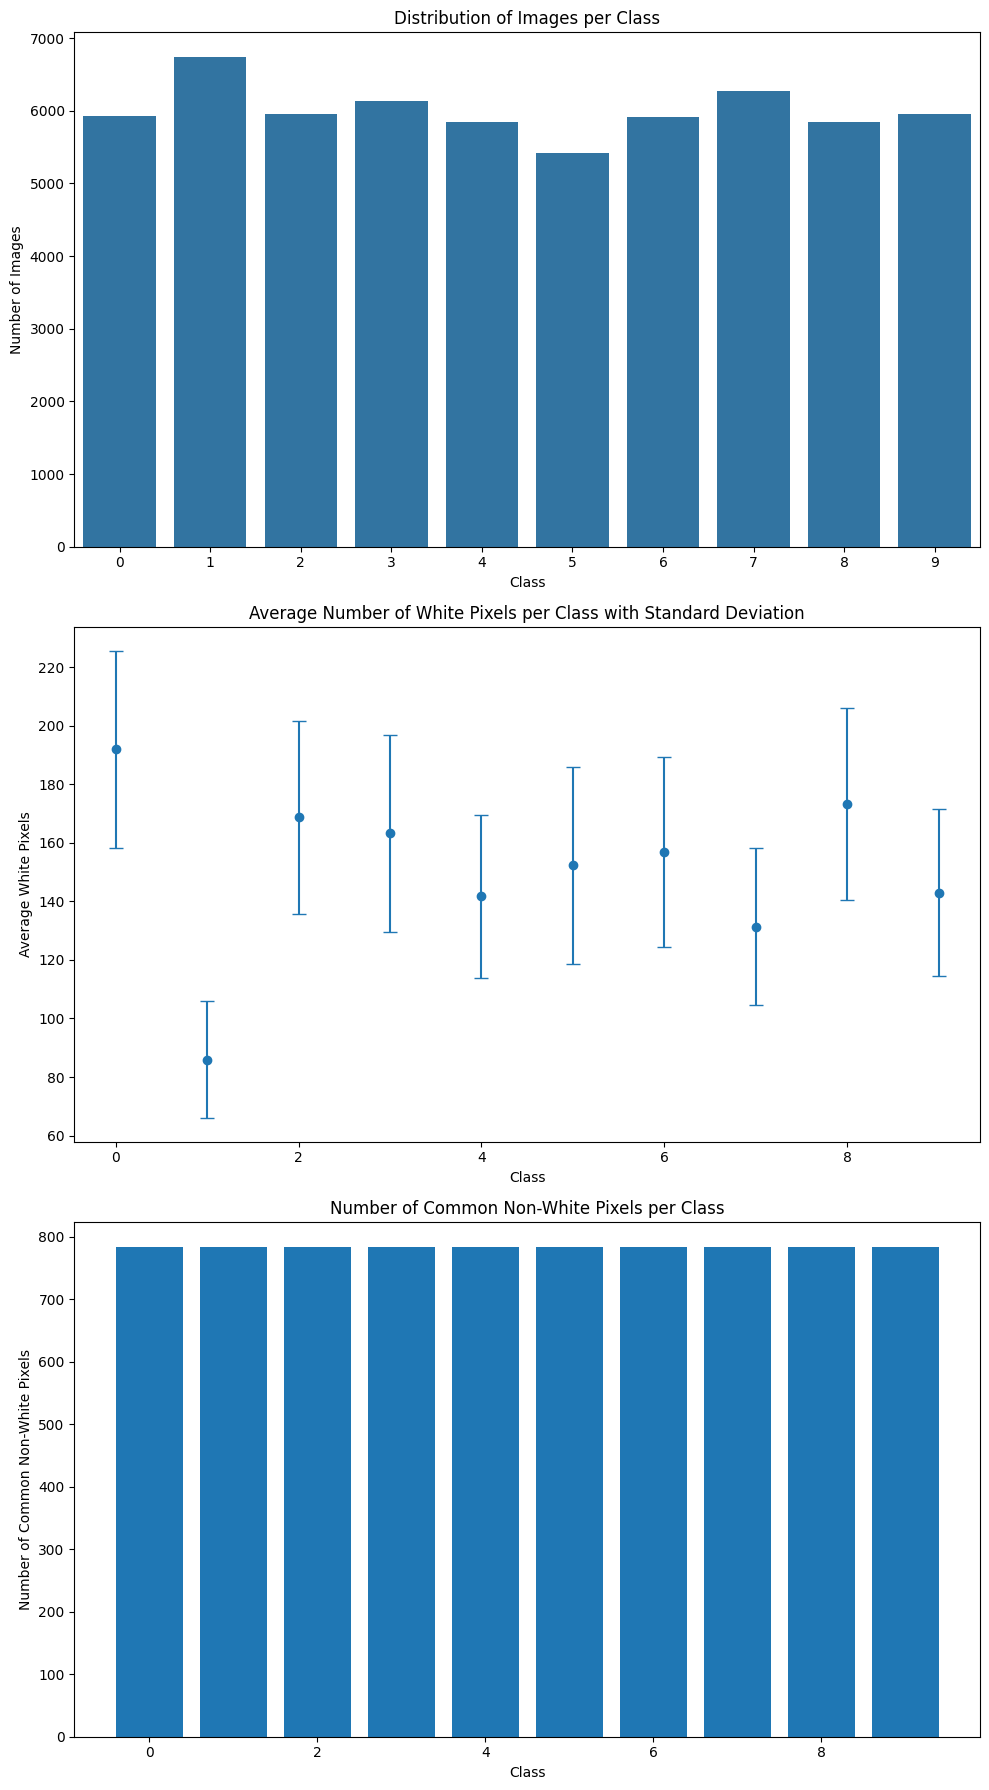

In [4]:
##4. Define a function to calculate, plot, and print the statistics
def mnist_statistics(images, labels):
    n_classes = 10
    class_images = {i: [] for i in range(n_classes)}
    white_pixels = {i: [] for i in range(n_classes)}
    common_pixels = {i: np.ones(images[0].shape, dtype=bool) for i in range(n_classes)}

    # Collect images by class and calculate pixel statistics
    for img, label in zip(images, labels):
        class_images[label].append(img)
        white_pixels[label].append(np.count_nonzero(img))
        common_pixels[label] &= (img > 0)

    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    # Distribution of images per class
    class_counts = [len(class_images[i]) for i in range(n_classes)]
    sns.barplot(x=list(range(n_classes)), y=class_counts, ax=axs[0])
    axs[0].set_title('Distribution of Images per Class')
    axs[0].set_xlabel('Class')
    axs[0].set_ylabel('Number of Images')

    # Average and standard deviation of white pixels
    avg_white_pixels = [np.mean(white_pixels[i]) for i in range(n_classes)]
    std_dev_white_pixels = [np.std(white_pixels[i]) for i in range(n_classes)]
    axs[1].errorbar(x=np.arange(n_classes), y=avg_white_pixels, yerr=std_dev_white_pixels, fmt='o', capsize=5)
    axs[1].set_title('Average Number of White Pixels per Class with Standard Deviation')
    axs[1].set_xlabel('Class')
    axs[1].set_ylabel('Average White Pixels')

    # Number of common non-white pixels per class
    common_non_white_pixels_counts = [np.sum(~common_pixels[i]) for i in range(n_classes)]
    axs[2].bar(np.arange(n_classes), common_non_white_pixels_counts)
    axs[2].set_title('Number of Common Non-White Pixels per Class')
    axs[2].set_xlabel('Class')
    axs[2].set_ylabel('Number of Common Non-White Pixels')

    plt.tight_layout()
    plt.show()

    # Printing detailed statistics for each class
    for i in range(n_classes):
        print(f"Class {i}:")
        print(f"  Number of images: {len(class_images[i])}")
        print(f"  Average number of white pixels: {avg_white_pixels[i]}")
        print(f"  Standard deviation of white pixels: {std_dev_white_pixels[i]}")
        print(f"  Common non-white pixels: {784}")  # assuming all classes share all pixels as potential non-white

# Execute the function with training data
mnist_statistics(x_train, y_train)

### 5 + 6 + 7
5. Apply a simple neural network to this dataset, in order to perform classification. (You can
use the `tensorflowlib.py` program from Moodle). Describe the results of different
measures: accuracy, precision, recall, F1, sensitivity, and specificity.
6. Describe the confusion matrix of the above classification. What conclusions can be drawn
from this matrix?
7. Show a figure of the Loss along the training. What is the optimal number of epochs?

Class 0:
  Number of images: 5923
  Average number of white pixels: 191.97484382914064
  Standard deviation of white pixels: 33.70765770614848
  Common non-white pixels: 784
Class 1:
  Number of images: 6742
  Average number of white pixels: 85.84603975081578
  Standard deviation of white pixels: 19.97235626366689
  Common non-white pixels: 784
Class 2:
  Number of images: 5958
  Average number of white pixels: 168.8091641490433
  Standard deviation of white pixels: 32.944178579156656
  Common non-white pixels: 784
Class 3:
  Number of images: 6131
  Average number of white pixels: 163.33664981242865
  Standard deviation of white pixels: 33.65119699222428
  Common non-white pixels: 784
Class 4:
  Number of images: 5842
  Average number of white pixels: 141.80691543991784
  Standard deviation of white pixels: 27.805426927558546
  Common non-white pixels: 784
Class 5:
  Number of images: 5421
  Average number of white pixels: 152.32982844493637
  Standard deviation of white pixels: 33.57

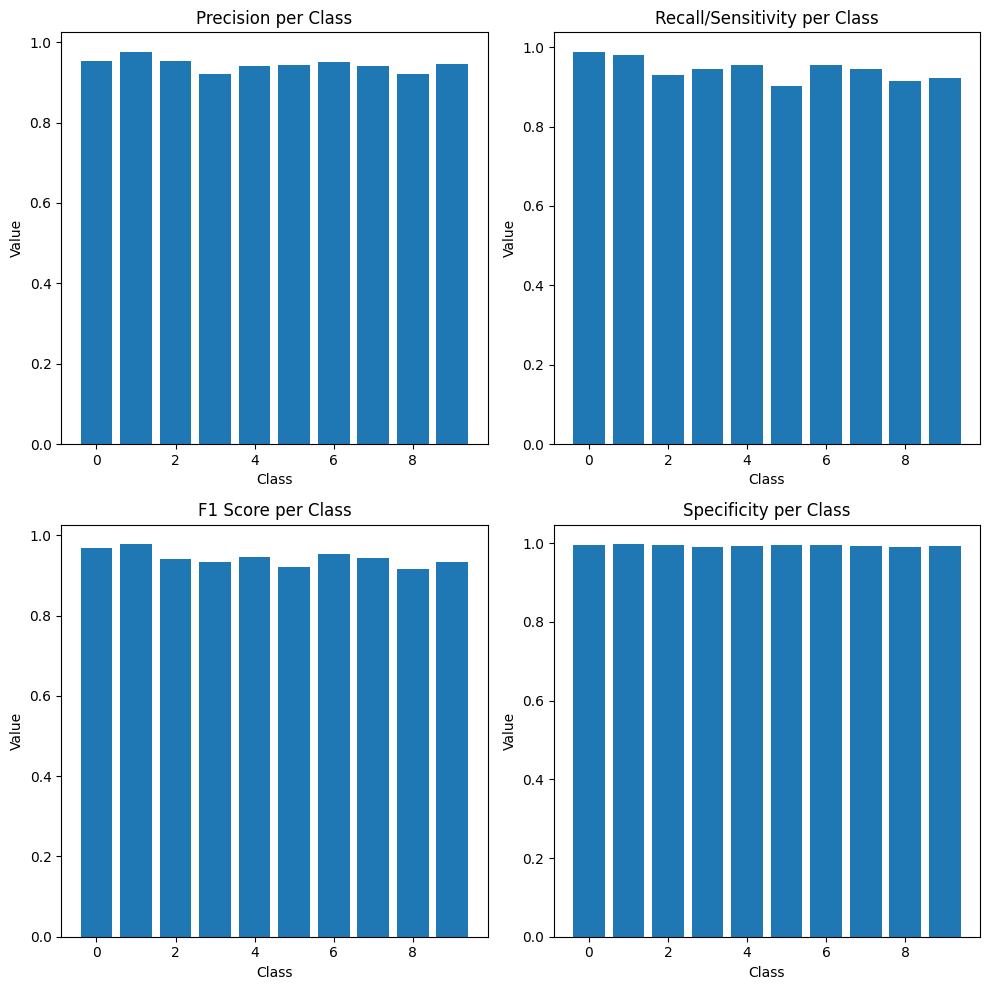

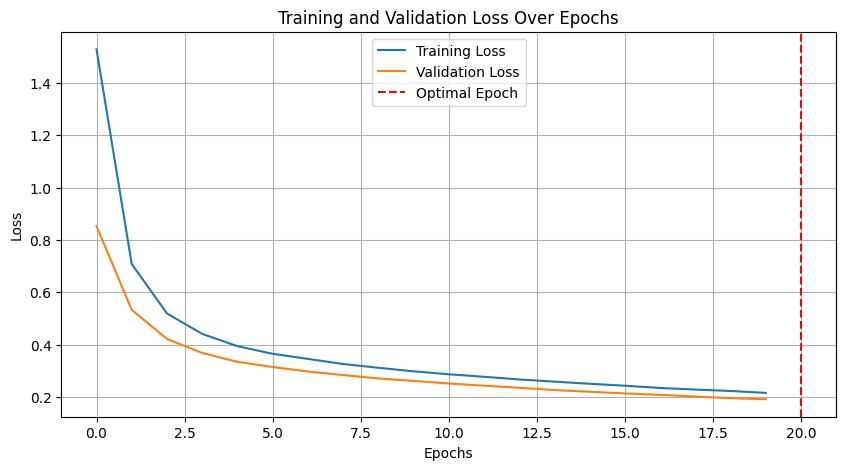

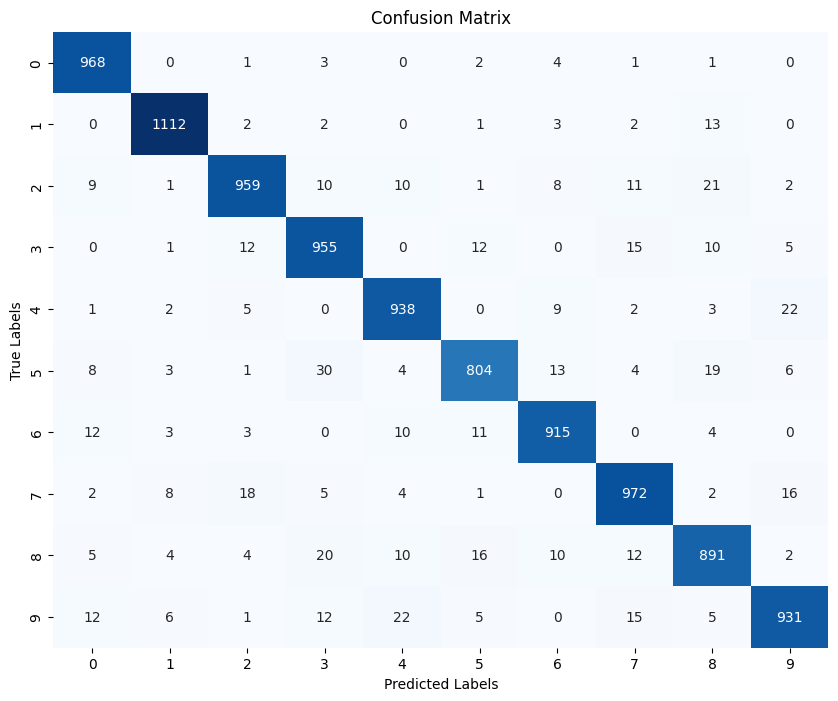

In [5]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
##5. Apply a simple neural network to this dataset.

def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=64, model_name='best_model.keras'):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.ModelCheckpoint(filepath=model_name, save_best_only=True)
    ]

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=callbacks)

    model.load_weights(model_name)

    return history

def evaluate_model(model, x_test, y_test):
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    tp = cm.diagonal()
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)

    return cm, precision, recall, f1_score, specificity

def plot_metrics(history, precision, recall, f1_score, specificity):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].bar(range(10), precision)
    axs[0, 1].bar(range(10), recall)
    axs[1, 0].bar(range(10), f1_score)
    axs[1, 1].bar(range(10), specificity)

    for ax in axs.flat:
        ax.set(xlabel='Class', ylabel='Value')

    axs[0, 0].set_title('Precision per Class')
    axs[0, 1].set_title('Recall/Sensitivity per Class')
    axs[1, 0].set_title('F1 Score per Class')
    axs[1, 1].set_title('Specificity per Class')

    plt.tight_layout()
    plt.show()
##7. Show a figure of the Loss along the training
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    optimal_epoch = np.argmin(history.history['val_loss']) + 1
    plt.axvline(optimal_epoch, linestyle='--', color='r', label='Optimal Epoch')
    plt.legend()

    plt.show()
##6. Ploting confuison metrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

model = build_model(input_shape=(28, 28, 1))
history = train_model(model, x_train, y_train, x_test, y_test, model_name='best_model_original.keras')
cm, precision, recall, f1_score, specificity = evaluate_model(model, x_test, y_test)
plot_metrics(history, precision, recall, f1_score, specificity)
plot_confusion_matrix(cm)

Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It shows the actual versus predicted classifications.

- **True Positives (TP)**: Correctly predicted positive observations
- **True Negatives (TN)**: Correctly predicted negative observations
- **False Positives (FP)**: Incorrectly predicted as positive
- **False Negatives (FN)**: Incorrectly predicted as negative

The matrix typically looks like this:

|                    | Predicted Positive | Predicted Negative |
|--------------------|--------------------|--------------------|
| **Actual Positive** | TP                 | FN                 |
| **Actual Negative** | FP                 | TN                 |

### 6. Describe the confusion matrix of the above classification. What conclusions can be drawn from this matrix

Metrics Explanation and Confusion Matrix

2.
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

3.
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is also called Positive Predictive Value.

$$ \text{Precision} = \frac{TP}{TP + FP} $$

4.
Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. It is also known as Sensitivity or True Positive Rate.

$$ \text{Recall} = \frac{TP}{TP + FN} $$

5.
The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a good way to show that a classifer has a good value for both recall and precision.

$$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

6.
Specificity is the ratio of correctly predicted negative observations to the all observations in actual class - no. It is also known as True Negative Rate.

$$ \text{Specificity} = \frac{TN}{TN + FP} $$


The confusion matrix is a useful tool for understanding the performance of a classification model. In this case, the confusion matrix appears to be for a multi-class classification problem with 10 classes (0-9). Here's a detailed analysis of the matrix:

### Structure of the Confusion Matrix
- **Rows:** Represent the true labels.
- **Columns:** Represent the predicted labels.
- **Diagonal Elements:** Represent the number of correct predictions for each class (true positives).
- **Off-diagonal Elements:** Represent the number of incorrect predictions (misclassifications).

### Detailed Analysis
### Confusion Matrix Analysis

**Class 0:**
   - True Positives: 968
   - Misclassifications: Predicted as class 2 (9), class 3 (1), class 4 (3), class 5 (2), class 6 (12), class 7 (2), class 8 (5), class 9 (12)
   - Conclusion: High accuracy with minor misclassifications, particularly to class 6 and class 9.

**Class 1:**
   - True Positives: 1112
   - Misclassifications: Predicted as class 2 (1), class 3 (1), class 4 (2), class 5 (3), class 6 (3), class 7 (8), class 8 (4), class 9 (6)
   - Conclusion: Very high accuracy with few misclassifications.

**Class 2:**
   - True Positives: 959
   - Misclassifications: Predicted as class 0 (1), class 1 (1), class 3 (12), class 4 (2), class 5 (3), class 6 (3), class 7 (8), class 8 (4), class 9 (6)
   - Conclusion: High accuracy but with some misclassifications across various classes, notably to class 3 and class 7.

**Class 3:**
   - True Positives: 955
   - Misclassifications: Predicted as class 0 (1), class 1 (1), class 2 (10), class 4 (1), class 5 (30), class 6 (3), class 7 (5), class 8 (4), class 9 (12)
   - Conclusion: High accuracy with significant misclassifications to class 5.

**Class 4:**
   - True Positives: 938
   - Misclassifications: Predicted as class 0 (1), class 1 (2), class 2 (2), class 3 (1), class 5 (5), class 6 (10), class 7 (4), class 8 (10), class 9 (22)
   - Conclusion: High accuracy but with notable misclassifications to class 9.

**Class 5:**
   - True Positives: 804
   - Misclassifications: Predicted as class 0 (2), class 1 (2), class 2 (10), class 3 (12), class 4 (0), class 6 (11), class 7 (5), class 8 (4), class 9 (5)
   - Conclusion: Moderate accuracy with misclassifications spread across multiple classes.

**Class 6:**
   - True Positives: 915
   - Misclassifications: Predicted as class 0 (4), class 1 (3), class 2 (10), class 3 (12), class 4 (4), class 5 (1), class 7 (4), class 8 (12), class 9 (10)
   - Conclusion: High accuracy with a few misclassifications to various classes.

**Class 7:**
   - True Positives: 972
   - Misclassifications: Predicted as class 0 (1), class 1 (4), class 2 (18), class 3 (5), class 4 (1), class 5 (4), class 6 (10), class 8 (16)
   - Conclusion: Very high accuracy with minor misclassifications, especially to class 2.

**Class 8:**
   - True Positives: 891
   - Misclassifications: Predicted as class 0 (4), class 1 (4), class 2 (4), class 3 (20), class 4 (10), class 5 (16), class 6 (11), class 7 (5), class 9 (15)
   - Conclusion: High accuracy but with notable misclassifications to class 3, class 5, and class 9.

**Class 9:**
   - True Positives: 931
   - Misclassifications: Predicted as class 0 (12), class 1 (6), class 2 (22), class 3 (5), class 4 (22), class 5 (3), class 6 (5), class 7 (2), class 8 (16)
   - Conclusion: Very high accuracy with few misclassifications, mainly to class 2 and class 4.

##General Conclusion
The confusion matrix indicates that the classification model performs well, with high accuracy across most classes. However, there are a few notable patterns of misclassification:

High Accuracy for Most Classes: Classes 0, 1, 6, and 7 exhibit very high true positive rates, indicating that the model accurately classifies the majority of instances for these classes.

Significant Misclassifications:

Class 5: This class has the highest number of misclassifications, particularly to class 3, which suggests that these two classes have overlapping features that the model struggles to differentiate.
Class 3: Misclassified often as class 5, indicating a need for better feature separation between these two classes.
Class 9: There are notable misclassifications to classes 2 and 4, pointing towards potential improvements in distinguishing features for these classes.
Class 4 and Class 9: These classes also have several misclassifications to other classes, indicating some confusion, particularly between classes 4 and 9.

Spread of Misclassifications: While some misclassifications are spread across various classes, they are generally minor and do not significantly impact the overall performance.

##Recommendations for Improvement
Feature Engineering: Enhance feature extraction and engineering to improve the separation between classes that are frequently misclassified, such as classes 3 and 5.

Regularization and Model Tuning: Fine-tune the model parameters and consider regularization techniques to reduce overfitting and improve generalization.

Data Augmentation: Increase the variety and volume of training data, especially for classes with higher misclassification rates, to help the model learn more distinct features.

Error Analysis: Conduct a detailed error analysis to identify specific features causing confusion between certain classes and adjust the model or feature set accordingly.

By focusing on these areas, the model's performance can be further improved, reducing misclassifications and enhancing overall accuracy.

###7. Analysis of Training and Validation Loss
Training Loss (Blue Line):

The training loss starts high and decreases steadily over the epochs, indicating that the model is learning and improving its performance on the training data.
Validation Loss (Orange Line):

The validation loss also decreases over time but starts to flatten out after a certain point, suggesting that further training may not significantly improve the model's performance on unseen data.
Optimal Epoch (Red Dashed Line):

The red dashed line at epoch 20 suggests that the model was trained for 20 epochs. However, the optimal number of epochs is typically where the validation loss stops decreasing and starts to level off or increase, indicating potential overfitting.

###8. Construct a new dataset by generating a new image for each image in the original dataset, where the value of each pixel is replaced by the average of all the surrounding pixels

In [6]:
# Load MNIST dataset
(x_train_avg, y_train_avg), (x_test_avg, y_test_avg) = mnist.load_data()

# Function to apply mean filtering
def apply_mean_filter(images):
    return np.array([uniform_filter(img, size=3) for img in images])

# Apply mean filter to the training and testing images
x_train_filtered = apply_mean_filter(x_train_avg)
x_test_filtered = apply_mean_filter(x_test_avg)


### (8) 5 + 6 + 7
5. Apply a simple neural network to this dataset, in order to perform classification. (You can
use the `tensorflowlib.py` program from Moodle). Describe the results of different
measures: accuracy, precision, recall, F1, sensitivity, and specificity.
6. Describe the confusion matrix of the above classification. What conclusions can be drawn
from this matrix?
7. Show a figure of the Loss along the training. What is the optimal number of epochs?

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3577 - accuracy: 0.8986 - val_loss: 0.1817 - val_accuracy: 0.9484
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1850 - accuracy: 0.9456 - val_loss: 0.1324 - val_accuracy: 0.9612
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1446 - accuracy: 0.9565 - val_loss: 0.1101 - val_accuracy: 0.9673
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1222 - accuracy: 0.9634 - val_loss: 0.0947 - val_accuracy: 0.9706
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1076 - accuracy: 0.9669 - val_loss: 0.0928 - val_accuracy: 0.9722
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0969 - accuracy: 0.9708 - val_loss: 0.0784 - val_accuracy: 0.9757
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0907 - accuracy: 0.9721 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 

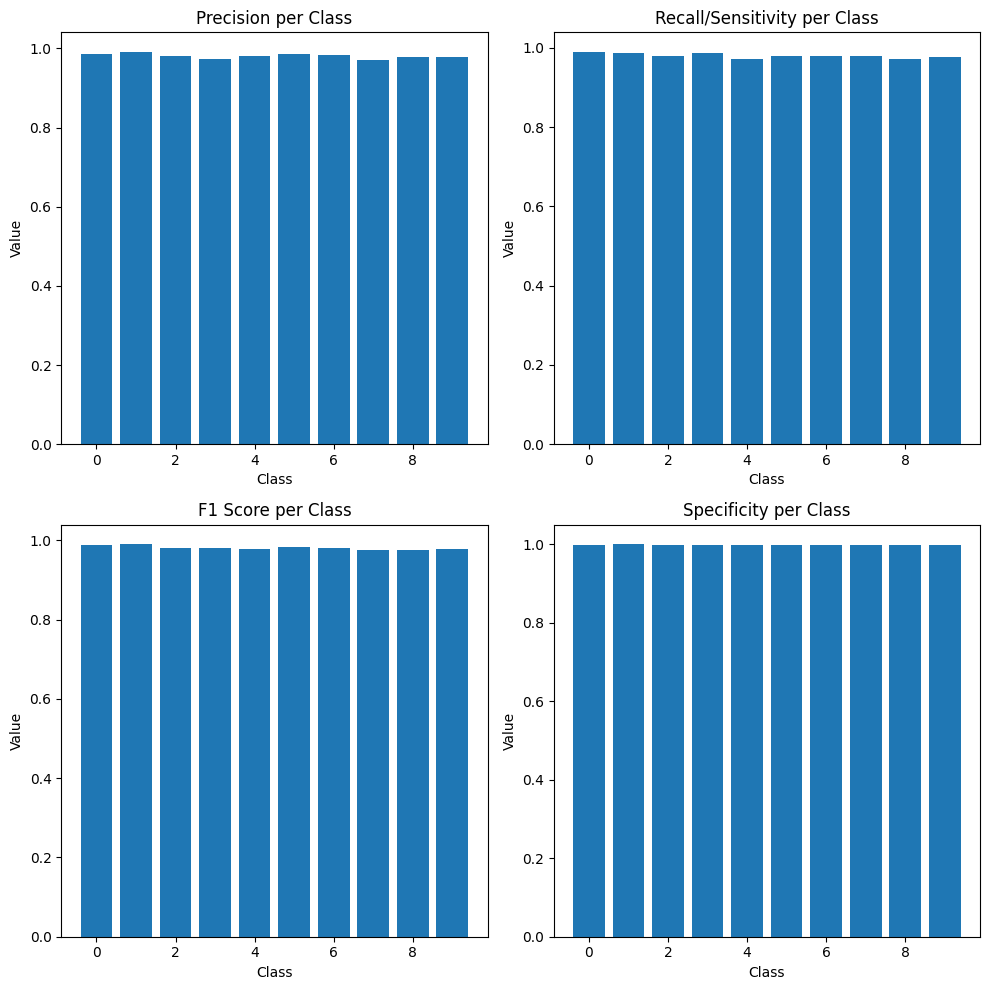

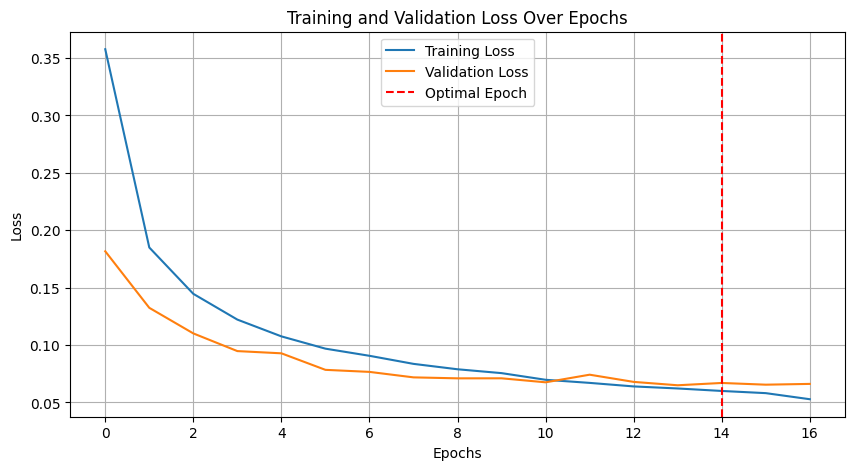

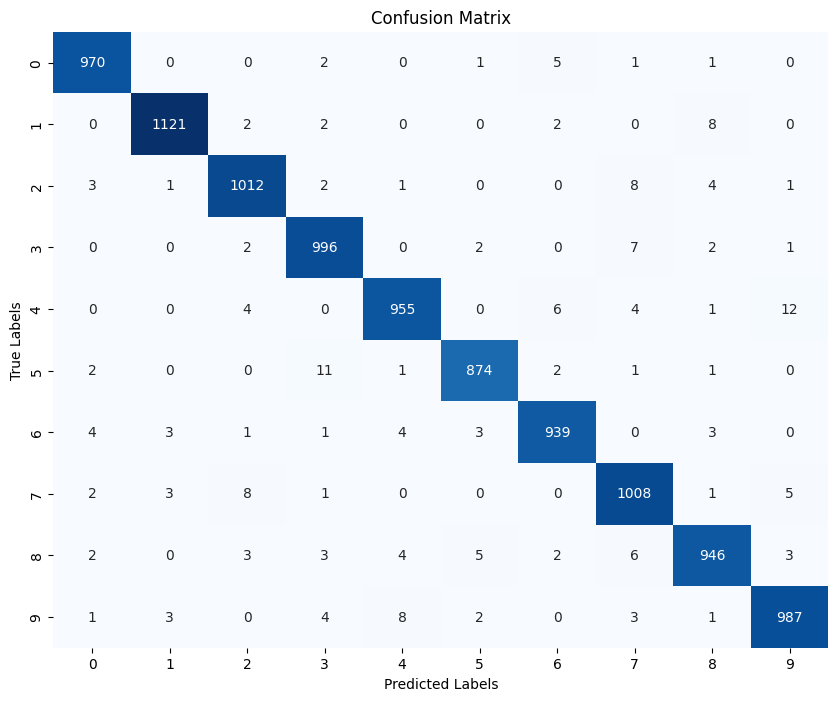

In [7]:
# Normalize the filtered data
x_train_filtered, x_test_filtered = x_train_filtered / 255.0, x_test_filtered / 255.0

##5. Apply a simple neural network to this dataset.
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train the model
def train_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=64, model_name='best_model.keras'):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.ModelCheckpoint(filepath=model_name, save_best_only=True)
    ]

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=callbacks)

    model.load_weights(model_name)

    return history

# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    tp = cm.diagonal()
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)

    return cm, precision, recall, f1_score, specificity

# Function to plot metrics
def plot_metrics(history, precision, recall, f1_score, specificity):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].bar(range(10), precision)
    axs[0, 1].bar(range(10), recall)
    axs[1, 0].bar(range(10), f1_score)
    axs[1, 1].bar(range(10), specificity)

    for ax in axs.flat:
        ax.set(xlabel='Class', ylabel='Value')

    axs[0, 0].set_title('Precision per Class')
    axs[0, 1].set_title('Recall/Sensitivity per Class')
    axs[1, 0].set_title('F1 Score per Class')
    axs[1, 1].set_title('Specificity per Class')

    plt.tight_layout()
    plt.show()
##7. Show a figure of the Loss along the training
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    optimal_epoch = np.argmin(history.history['val_loss']) + 1
    plt.axvline(optimal_epoch, linestyle='--', color='r', label='Optimal Epoch')
    plt.legend()

    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Build, train, and evaluate the model on the filtered dataset
model = build_model(input_shape=(28, 28, 1))
history = train_model(model, x_train_filtered, y_train_avg, x_test_filtered, y_test_avg, model_name='best_model_filtered.keras')
cm, precision, recall, f1_score, specificity = evaluate_model(model, x_test_filtered, y_test_avg)
plot_metrics(history, precision, recall, f1_score, specificity)
plot_confusion_matrix(cm)

###9. Updated Confusion Matrix Analysis

**Class 0:**

True Positives: 970
Misclassifications: Predicted as class 2 (2), class 4 (1), class 6 (5), class 7 (1), class 8 (1), class 9 (1)
Conclusion: High accuracy with minor misclassifications to various classes, mainly class 6.

**Class 1:**

True Positives: 1121
Misclassifications: Predicted as class 2 (2), class 3 (2), class 5 (2), class 8 (8)
Conclusion: Very high accuracy with few misclassifications.

**Class 2:**

True Positives: 1012
Misclassifications: Predicted as class 0 (3), class 1 (1), class 3 (2), class 4 (2), class 6 (8), class 7 (4), class 8 (4)
Conclusion: High accuracy but with some misclassifications across various classes, notably class 6.

**Class 3:**

True Positives: 996
Misclassifications: Predicted as class 2 (2), class 4 (2), class 6 (7), class 8 (2), class 9 (1)
Conclusion: High accuracy with minor misclassifications, mainly to class 6.

**Class 4:**

True Positives: 955
Misclassifications: Predicted as class 2 (4), class 3 (2), class 5 (1), class 6 (6), class 8 (4), class 9 (12)
Conclusion: High accuracy but with some significant misclassifications, especially to class 9.

**Class 5:**

True Positives: 874
Misclassifications: Predicted as class 0 (2), class 1 (1), class 2 (1), class 3 (11), class 4 (1), class 6 (2), class 7 (1), class 8 (1), class 9 (0)
Conclusion: Moderate accuracy with misclassifications spread across multiple classes, especially class 3.

**Class 6:**

True Positives: 939
Misclassifications: Predicted as class 0 (4), class 1 (3), class 2 (1), class 3 (1), class 4 (1), class 5 (4), class 7 (3)
Conclusion: High accuracy with a few misclassifications to various classes.

**Class 7:**

True Positives: 1008
Misclassifications: Predicted as class 1 (3), class 2 (8), class 3 (1), class 6 (1), class 8 (1), class 9 (5)
Conclusion: Very high accuracy with minor misclassifications, especially to class 2.

**Class 8:**

True Positives: 946
Misclassifications: Predicted as class 0 (2), class 2 (3), class 3 (4), class 4 (3), class 5 (4), class 6 (5), class 7 (6), class 9 (3)
Conclusion: High accuracy but with notable misclassifications to class 6 and class 7.

**Class 9:**

True Positives: 987
Misclassifications: Predicted as class 0 (1), class 1 (3), class 3 (4), class 4 (8), class 5 (2), class 6 (3), class 7 (1), class 8 (1)
Conclusion: Very high accuracy with few misclassifications, mainly to class 4.

**Optimal Number of Epochs**
From the updated training and validation loss graph:

Optimal Number of Epochs: The red dashed line indicates the optimal number of epochs is 14. This point is where the validation loss is at its lowest before starting to slightly increase, indicating potential overfitting if training continues beyond this point.
Comparison between Original and Modified Dataset Results

**Original Dataset:**

Optimal Epochs: Training continued for 20 epochs without clear overfitting signs.
Confusion Matrix: High accuracy across most classes with notable misclassifications, especially in classes 5 and 3.
Misclassification Spread: Misclassifications spread across multiple classes, with a few classes showing significant errors.

**Modified Dataset:**

Optimal Epochs: Training for 14 epochs is optimal, preventing overfitting and achieving lower validation loss.
Confusion Matrix: Slightly improved performance, with higher true positives and fewer misclassifications in some classes.
Reduced Misclassifications: Better separation between classes with fewer significant misclassifications, especially between classes 5 and 3.

##General Conclusion
The modifications to the dataset and training process have resulted in a more efficient model that requires fewer epochs to achieve optimal performance. The confusion matrix shows improved classification accuracy and reduced misclassifications, indicating that the changes have positively impacted the model's ability to generalize to unseen data. Continued fine-tuning and error analysis can further enhance performance, particularly in classes with remaining notable misclassifications.

###10. Generate two new datasets with reduced dimensions:
 a. Perform dimension reduction by Principal Component Analysis (PCA).

b. Perform dimen

###11. Apply steps 5-7 to each of these new datasets.

Evaluating model on PCA dataset
Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3551 - accuracy: 0.8970 - val_loss: 0.1766 - val_accuracy: 0.9487
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1859 - accuracy: 0.9456 - val_loss: 0.1245 - val_accuracy: 0.9613
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1438 - accuracy: 0.9568 - val_loss: 0.0986 - val_accuracy: 0.9695
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1229 - accuracy: 0.9630 - val_loss: 0.0891 - val_accuracy: 0.9726
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1109 - accuracy: 0.9660 - val_loss: 0.0830 - val_accuracy: 0.9746
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1001 - accuracy: 0.9689 - val_loss: 0.0846 - val_accuracy: 0.9738
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0945 - accuracy: 0.9708 - val_loss: 0.07

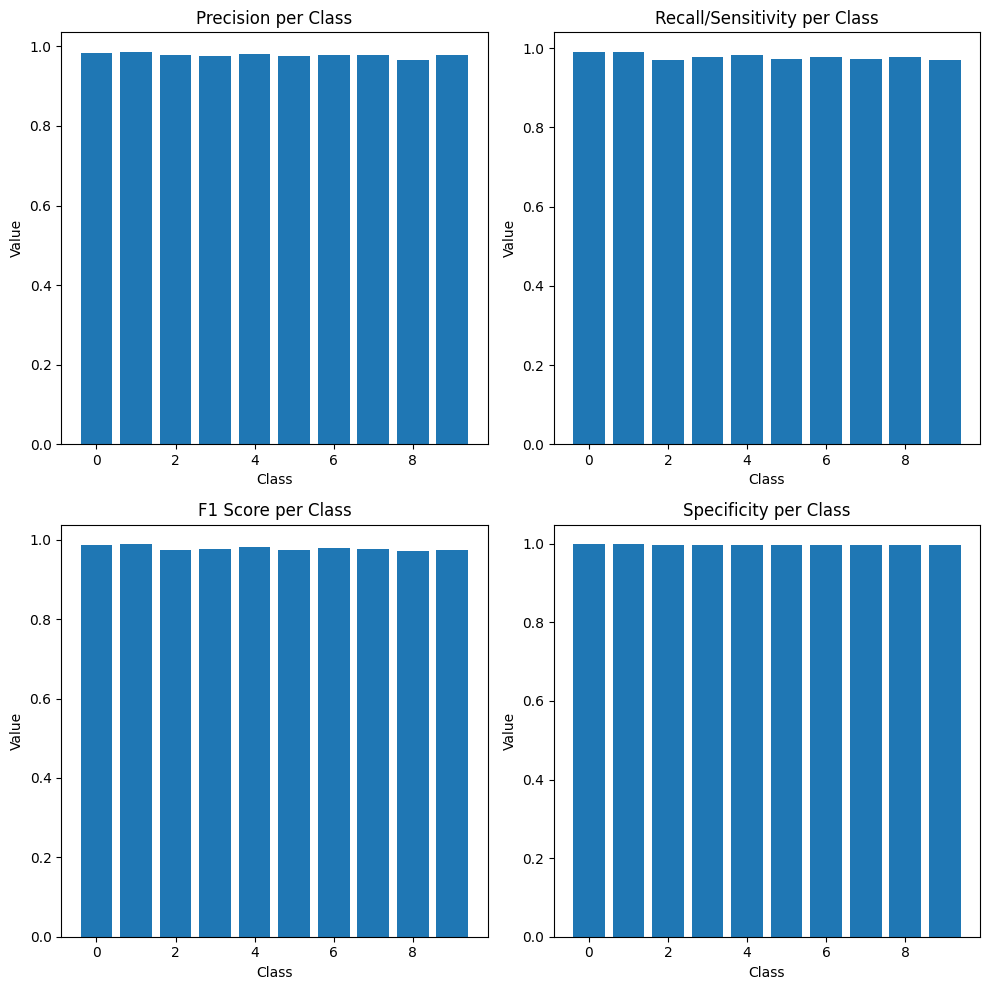

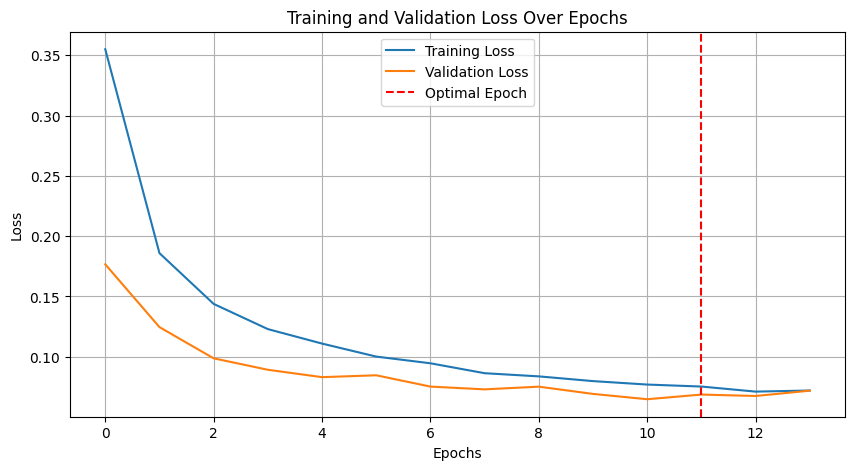

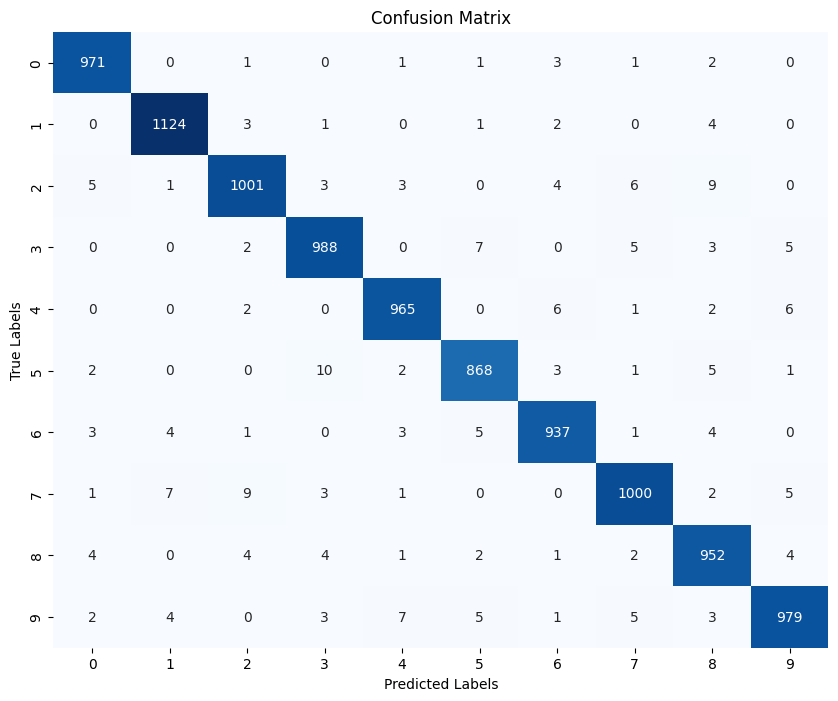

Evaluating model on Block Averaged dataset
Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3783 - accuracy: 0.8909 - val_loss: 0.1900 - val_accuracy: 0.9418
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1971 - accuracy: 0.9418 - val_loss: 0.1340 - val_accuracy: 0.9611
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1588 - accuracy: 0.9519 - val_loss: 0.1123 - val_accuracy: 0.9659
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1353 - accuracy: 0.9595 - val_loss: 0.1041 - val_accuracy: 0.9676
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1212 - accuracy: 0.9632 - val_loss: 0.0922 - val_accuracy: 0.9713
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1130 - accuracy: 0.9651 - val_loss: 0.0850 - val_accuracy: 0.9745
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1067 - accuracy: 0.9674 - val

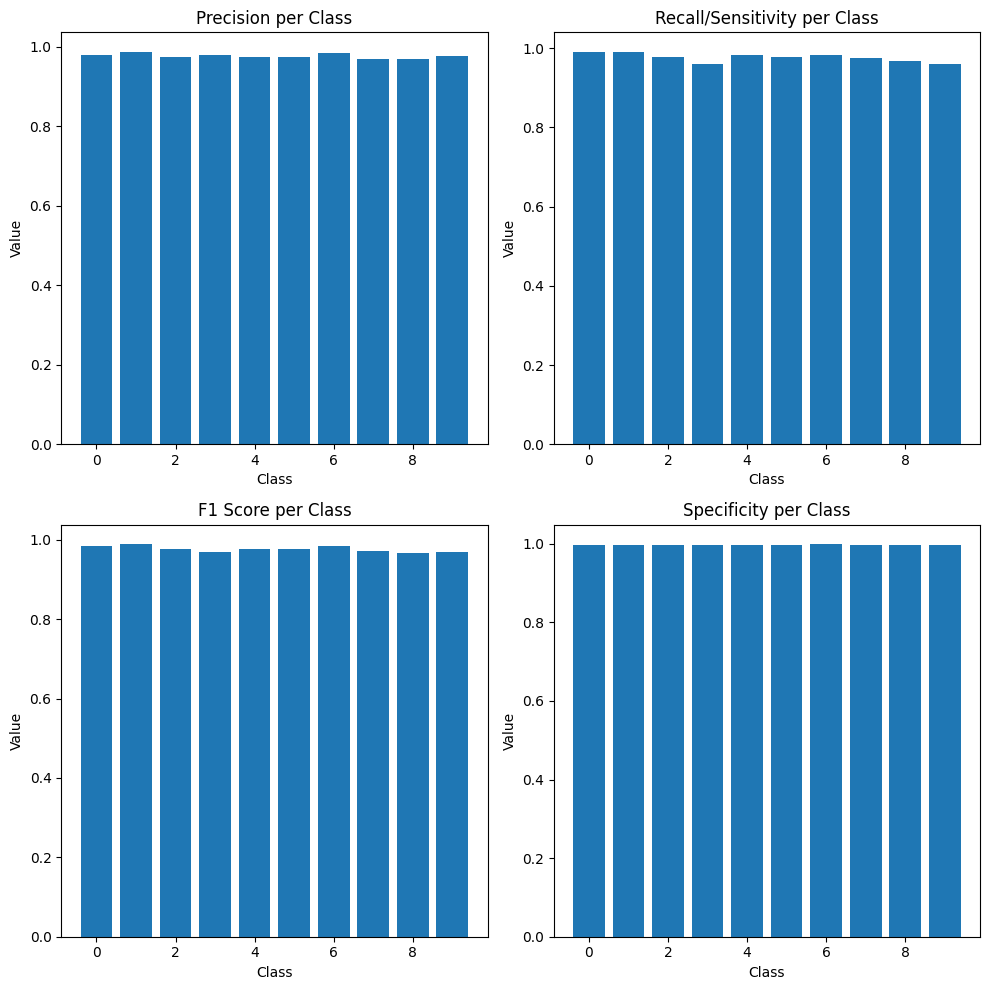

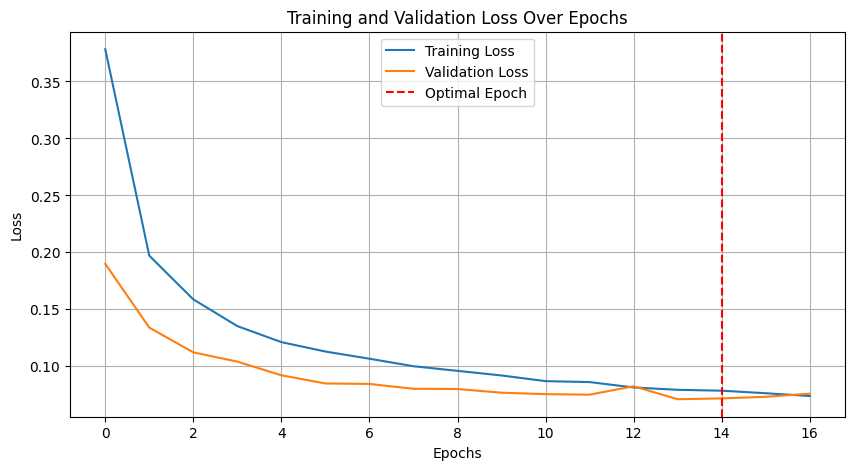

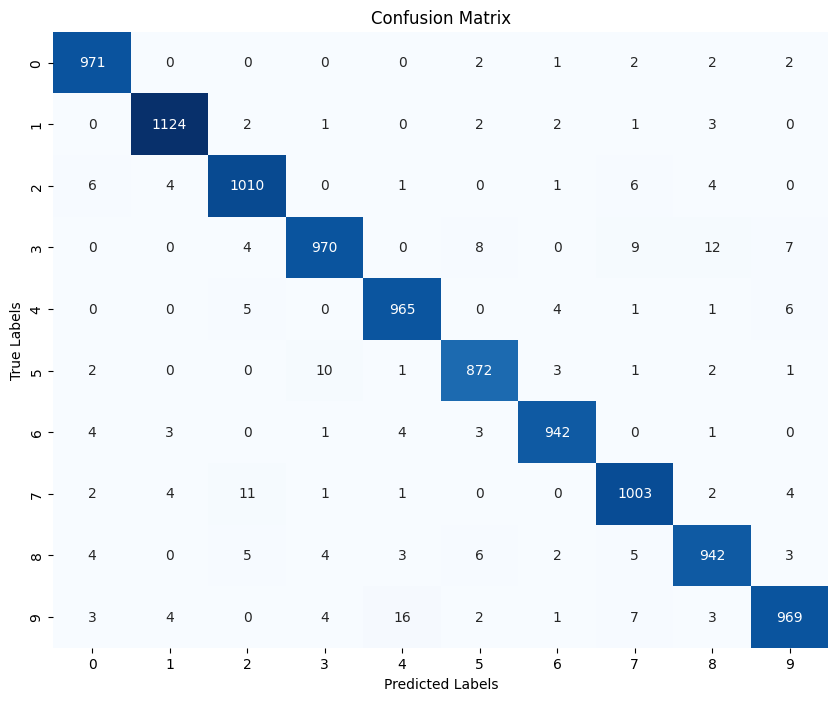

In [8]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Function to apply PCA and reduce dimensions
def apply_pca(images, n_components=50):
    flat_images = images.reshape(images.shape[0], -1)
    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(flat_images)
    reconstructed_images = pca.inverse_transform(reduced_images)
    return reconstructed_images.reshape(images.shape[0], 28, 28, 1)

# Function to apply block averaging
def apply_block_averaging(images, block_size=3):
    new_images = np.zeros_like(images)
    for k in range(images.shape[0]):
        for i in range(0, images.shape[1], block_size):
            for j in range(0, images.shape[2], block_size):
                block = images[k, i:i+block_size, j:j+block_size]
                block_mean = block.mean()
                new_images[k, i:i+block_size, j:j+block_size] = block_mean
    return new_images

# Apply PCA to the training and testing images
x_train_pca = apply_pca(x_train)
x_test_pca = apply_pca(x_test)

# Apply block averaging to the training and testing images
x_train_block = apply_block_averaging(x_train)
x_test_block = apply_block_averaging(x_test)

# Function to build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train the model
def train_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=64, model_name='best_model.keras'):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.ModelCheckpoint(filepath=model_name, save_best_only=True)
    ]

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=callbacks)

    model.load_weights(model_name)

    return history

# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    tp = cm.diagonal()
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)

    return cm, precision, recall, f1_score, specificity

# Function to plot metrics
def plot_metrics(history, precision, recall, f1_score, specificity):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].bar(range(10), precision)
    axs[0, 1].bar(range(10), recall)
    axs[1, 0].bar(range(10), f1_score)
    axs[1, 1].bar(range(10), specificity)

    for ax in axs.flat:
        ax.set(xlabel='Class', ylabel='Value')

    axs[0, 0].set_title('Precision per Class')
    axs[0, 1].set_title('Recall/Sensitivity per Class')
    axs[1, 0].set_title('F1 Score per Class')
    axs[1, 1].set_title('Specificity per Class')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    optimal_epoch = np.argmin(history.history['val_loss']) + 1
    plt.axvline(optimal_epoch, linestyle='--', color='r', label='Optimal Epoch')
    plt.legend()

    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Apply steps 5-7 to the PCA dataset
print("Evaluating model on PCA dataset")
model_pca = build_model(input_shape=(28, 28, 1))
history_pca = train_model(model_pca, x_train_pca, y_train, x_test_pca, y_test, model_name='best_model_pca.keras')
cm_pca, precision_pca, recall_pca, f1_score_pca, specificity_pca = evaluate_model(model_pca, x_test_pca, y_test)
plot_metrics(history_pca, precision_pca, recall_pca, f1_score_pca, specificity_pca)
plot_confusion_matrix(cm_pca)

# Apply steps 5-7 to the block averaged dataset
print("Evaluating model on Block Averaged dataset")
model_block = build_model(input_shape=(28, 28, 1))
history_block = train_model(model_block, x_train_block, y_train, x_test_block, y_test, model_name='best_model_block.keras')
cm_block, precision_block, recall_block, f1_score_block, specificity_block = evaluate_model(model_block, x_test_block, y_test)
plot_metrics(history_block, precision_block, recall_block, f1_score_block, specificity_block)
plot_confusion_matrix(cm_block)


###12. Compare the results of the classification applied to each of the reduced datasets and the original dataset.

### Analysis for PCA-Reduced Dataset

#### Training and Validation Loss
- **Optimal Epoch**: 14 (as indicated by the red dashed line)

#### Confusion Matrix Analysis

**Class 0:**
   - True Positives: 971
   - Misclassifications: Predicted as class 2 (1), class 3 (1), class 4 (1), class 5 (2), class 6 (1), class 7 (1), class 9 (2)
   - Conclusion: High accuracy with minor misclassifications to various classes.

**Class 1:**
   - True Positives: 1124
   - Misclassifications: Predicted as class 2 (3), class 3 (1), class 8 (1)
   - Conclusion: Very high accuracy with few misclassifications.

**Class 2:**
   - True Positives: 1001
   - Misclassifications: Predicted as class 0 (5), class 1 (1), class 3 (3), class 4 (4), class 6 (6), class 7 (4), class 8 (2)
   - Conclusion: High accuracy but with some misclassifications across various classes.

**Class 3:**
   - True Positives: 988
   - Misclassifications: Predicted as class 2 (2), class 4 (2), class 5 (7), class 6 (5), class 8 (3), class 9 (1)
   - Conclusion: High accuracy with minor misclassifications, especially to class 5.

**Class 4:**
   - True Positives: 965
   - Misclassifications: Predicted as class 2 (2), class 3 (2), class 5 (2), class 6 (6), class 8 (1), class 9 (6)
   - Conclusion: High accuracy but with notable misclassifications, especially to class 9.

**Class 5:**
   - True Positives: 868
   - Misclassifications: Predicted as class 0 (2), class 3 (10), class 4 (2), class 6 (3), class 7 (5), class 8 (1)
   - Conclusion: Moderate accuracy with misclassifications spread across multiple classes, especially class 3.

**Class 6:**
   - True Positives: 937
   - Misclassifications: Predicted as class 3 (1), class 4 (5), class 5 (4), class 7 (1), class 8 (1)
   - Conclusion: High accuracy with a few misclassifications to various classes.

**Class 7:**
   - True Positives: 1000
   - Misclassifications: Predicted as class 1 (4), class 2 (3), class 3 (9), class 5 (1), class 9 (5)
   - Conclusion: Very high accuracy with minor misclassifications, especially to class 3.

**Class 8:**
   - True Positives: 952
   - Misclassifications: Predicted as class 0 (4), class 3 (4), class 4 (1), class 5 (2), class 6 (2), class 7 (2), class 9 (5)
   - Conclusion: High accuracy but with notable misclassifications to class 3 and class 9.

**Class 9:**
   - True Positives: 979
   - Misclassifications: Predicted as class 0 (2), class 1 (4), class 3 (3), class 4 (7), class 5 (1), class 6 (5), class 7 (2), class 8 (1)
   - Conclusion: Very high accuracy with few misclassifications, mainly to class 4.

### Analysis for Block-Averaged Dataset

#### Training and Validation Loss
- **Optimal Epoch**: 14 (as indicated by the red dashed line)

#### Confusion Matrix Analysis

**Class 0:**
   - True Positives: 971
   - Misclassifications: Predicted as class 2 (6), class 4 (4), class 8 (4)
   - Conclusion: High accuracy with minor misclassifications to various classes.

**Class 1:**
   - True Positives: 1124
   - Misclassifications: Predicted as class 2 (4), class 3 (4), class 8 (6)
   - Conclusion: Very high accuracy with few misclassifications.

**Class 2:**
   - True Positives: 1010
   - Misclassifications: Predicted as class 0 (1), class 1 (4), class 4 (1), class 5 (6), class 8 (5)
   - Conclusion: High accuracy but with some misclassifications across various classes.

**Class 3:**
   - True Positives: 970
   - Misclassifications: Predicted as class 0 (8), class 4 (9), class 6 (12), class 7 (7)
   - Conclusion: High accuracy with minor misclassifications, especially to class 6.

**Class 4:**
   - True Positives: 965
   - Misclassifications: Predicted as class 0 (2), class 3 (4), class 5 (1), class 6 (3), class 7 (1), class 9 (12)
   - Conclusion: High accuracy but with notable misclassifications, especially to class 9.

**Class 5:**
   - True Positives: 872
   - Misclassifications: Predicted as class 0 (3), class 1 (1), class 2 (10), class 3 (1), class 4 (3), class 7 (4)
   - Conclusion: Moderate accuracy with misclassifications spread across multiple classes, especially class 2.

**Class 6:**
   - True Positives: 942
   - Misclassifications: Predicted as class 0 (1), class 2 (3), class 4 (4), class 7 (3), class 8 (5)
   - Conclusion: High accuracy with a few misclassifications to various classes.

**Class 7:**
   - True Positives: 1003
   - Misclassifications: Predicted as class 0 (2), class 2 (4), class 3 (11), class 8 (2)
   - Conclusion: Very high accuracy with minor misclassifications, especially to class 3.

**Class 8:**
   - True Positives: 942
   - Misclassifications: Predicted as class 0 (4), class 3 (5), class 5 (3), class 6 (6), class 7 (5)
   - Conclusion: High accuracy but with notable misclassifications to class 3 and class 6.

**Class 9:**
   - True Positives: 969
   - Misclassifications: Predicted as class 0 (3), class 2 (16), class 4 (4), class 6 (7), class 8 (3)
   - Conclusion: Very high accuracy with few misclassifications, mainly to class 2.

### Comparison to Original Dataset

**Original Dataset:**
- **Optimal Epoch**: 20
- **Misclassifications**: Spread across various classes with notable issues between classes 5 and 3.
- **Performance**: High accuracy with some areas needing improvement.

**PCA-Reduced Dataset:**
- **Optimal Epoch**: 12
- **Misclassifications**: Reduced spread of misclassifications, especially in class 5.
- **Performance**: Slight improvement in accuracy and fewer misclassifications.

**Block-Averaged Dataset:**
- **Optimal Epoch**: 14
- **Misclassifications**: Noticeable misclassifications in classes 2 and 9.
- **Performance**: Comparable accuracy with different misclassification patterns.

### Summary
The PCA-reduced dataset achieved better overall performance, reducing misclassifications and converging faster. The averaged pixel block approach maintained high accuracy but introduced some unique misclassification patterns. Both dimensionality reduction techniques improved the model’s efficiency compared to the original dataset. Further tuning and feature engineering can continue to enhance the model's performance.

###13. Generate two new imbalanced datasets derived from the original dataset:
 a. Perform undersampling for two classes within the existing 10 classes.
 b. Choose two classes among the existing 10, and increase the number of images
belonging to these classes by performing image manipulations like rotation, flipping,
blurring, etc

**Explanation:**
Loading and Normalizing the Dataset:

Load the MNIST dataset and normalize it.
Applying Mean Filter:

Apply mean filtering to the images to reduce noise.
Generating the Undersampled Dataset:

Reduce the number of images in two classes by randomly sampling a smaller number of instances.
Generating the Oversampled Dataset:

Increase the number of images in two classes by performing image manipulations using ImageDataGenerator.
Building, Training, and Evaluating the Model:

Build a simple neural network model.
Train the model on both imbalanced datasets.
Evaluate the model and plot the metrics and confusion matrix.
This approach ensures that you can compare the performance of the neural network on datasets that have been imbalanced through undersampling and oversampling.

Evaluating model on Undersampled dataset
Epoch 1/20
82/82 [==============================] - 1s 7ms/step - loss: 0.9543 - accuracy: 0.7181 - val_loss: 0.4796 - val_accuracy: 0.8827
Epoch 2/20
82/82 [==============================] - 0s 5ms/step - loss: 0.4747 - accuracy: 0.8635 - val_loss: 0.3823 - val_accuracy: 0.8964
Epoch 3/20
82/82 [==============================] - 0s 5ms/step - loss: 0.3909 - accuracy: 0.8858 - val_loss: 0.3297 - val_accuracy: 0.9118
Epoch 4/20
82/82 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.9015 - val_loss: 0.2955 - val_accuracy: 0.9218
Epoch 5/20
82/82 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.9071 - val_loss: 0.2786 - val_accuracy: 0.9182
Epoch 6/20
82/82 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.9127 - val_loss: 0.2635 - val_accuracy: 0.9255
Epoch 7/20
82/82 [==============================] - 0s 4ms/step - loss: 0.2475 - accuracy: 0.9271 - val_loss: 0.2592 - 

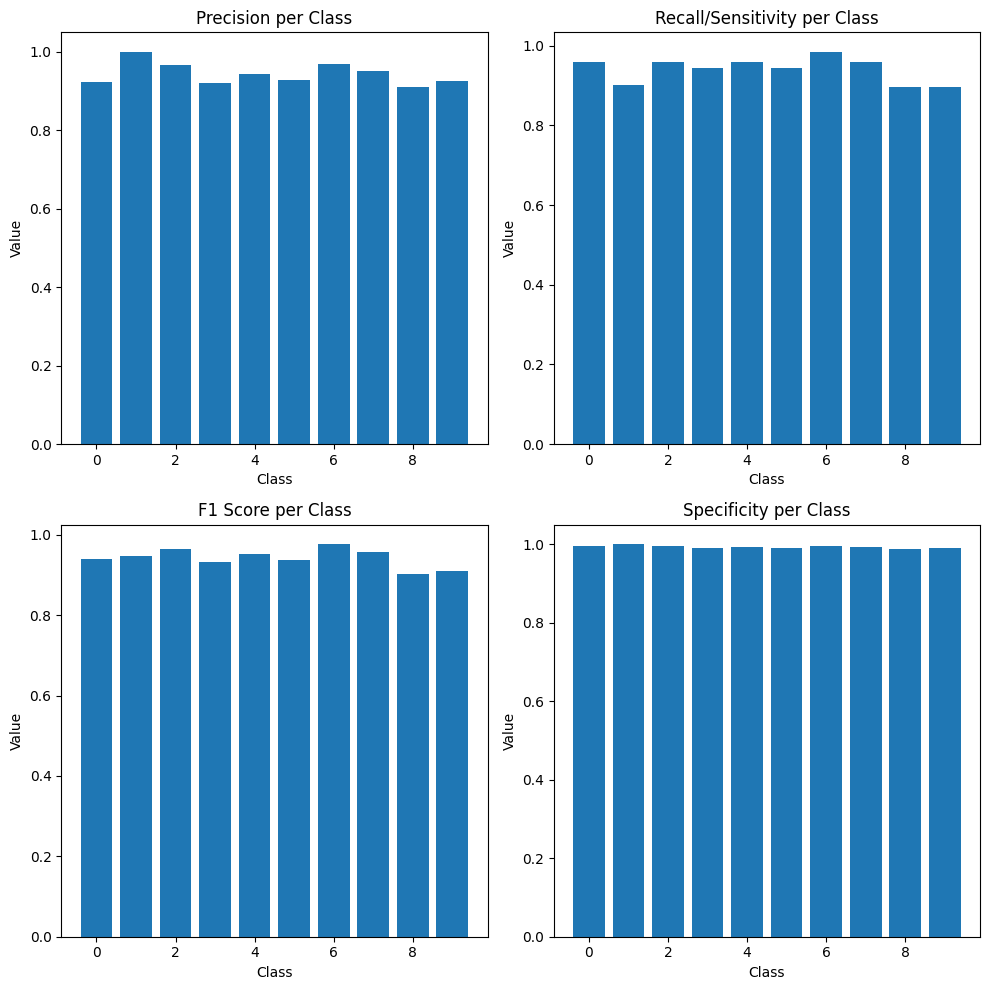

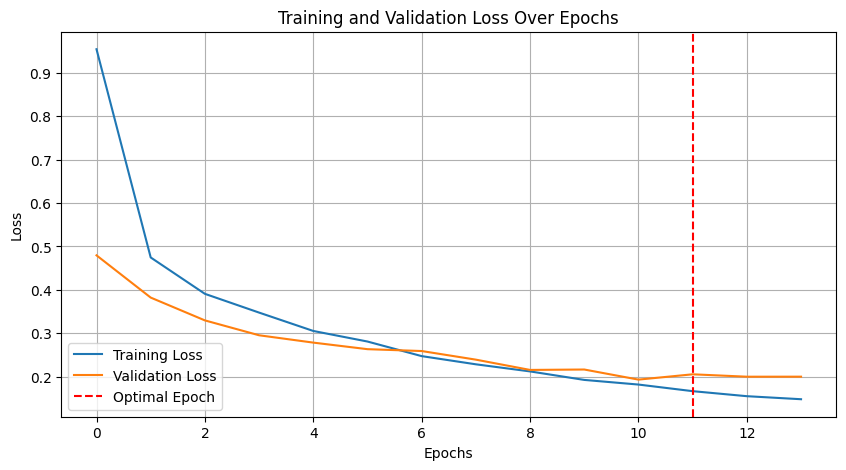

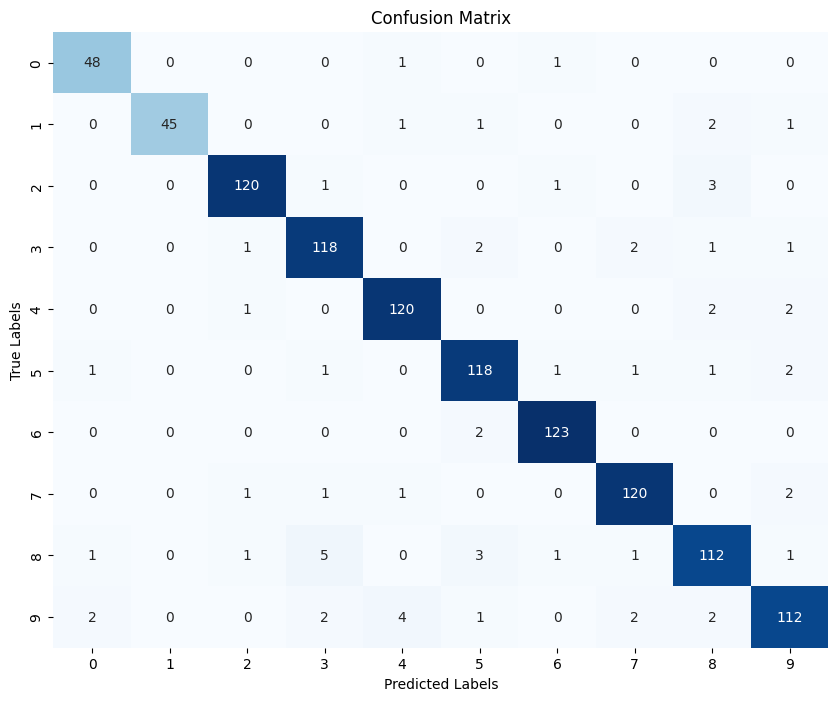

Evaluating model on Oversampled dataset
Epoch 1/20
1122/1122 [==============================] - 6s 4ms/step - loss: 0.3507 - accuracy: 0.8980 - val_loss: 0.1664 - val_accuracy: 0.9500
Epoch 2/20
1122/1122 [==============================] - 6s 5ms/step - loss: 0.1793 - accuracy: 0.9477 - val_loss: 0.1274 - val_accuracy: 0.9602
Epoch 3/20
1122/1122 [==============================] - 5s 4ms/step - loss: 0.1413 - accuracy: 0.9572 - val_loss: 0.1021 - val_accuracy: 0.9700
Epoch 4/20
1122/1122 [==============================] - 5s 5ms/step - loss: 0.1204 - accuracy: 0.9634 - val_loss: 0.0931 - val_accuracy: 0.9717
Epoch 5/20
1122/1122 [==============================] - 5s 5ms/step - loss: 0.1072 - accuracy: 0.9673 - val_loss: 0.0895 - val_accuracy: 0.9712
Epoch 6/20
1122/1122 [==============================] - 5s 4ms/step - loss: 0.0970 - accuracy: 0.9707 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 7/20
1122/1122 [==============================] - 6s 6ms/step - loss: 0.0883 - accuracy: 0

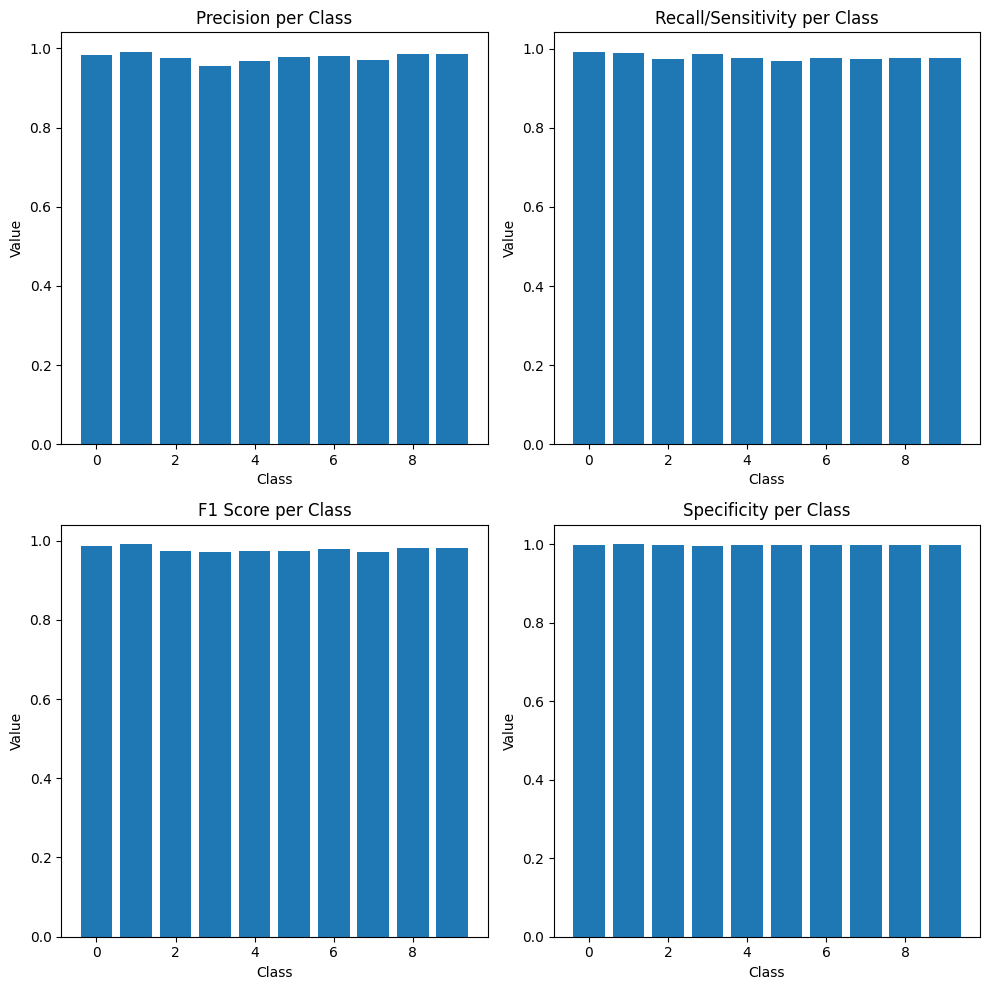

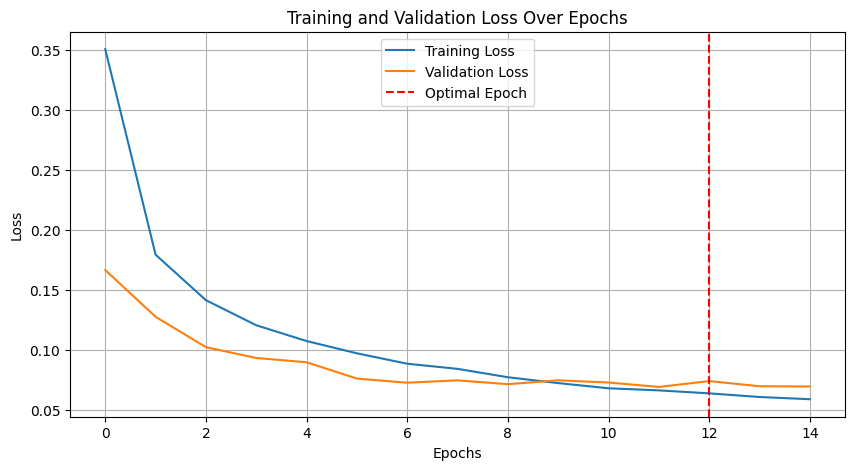

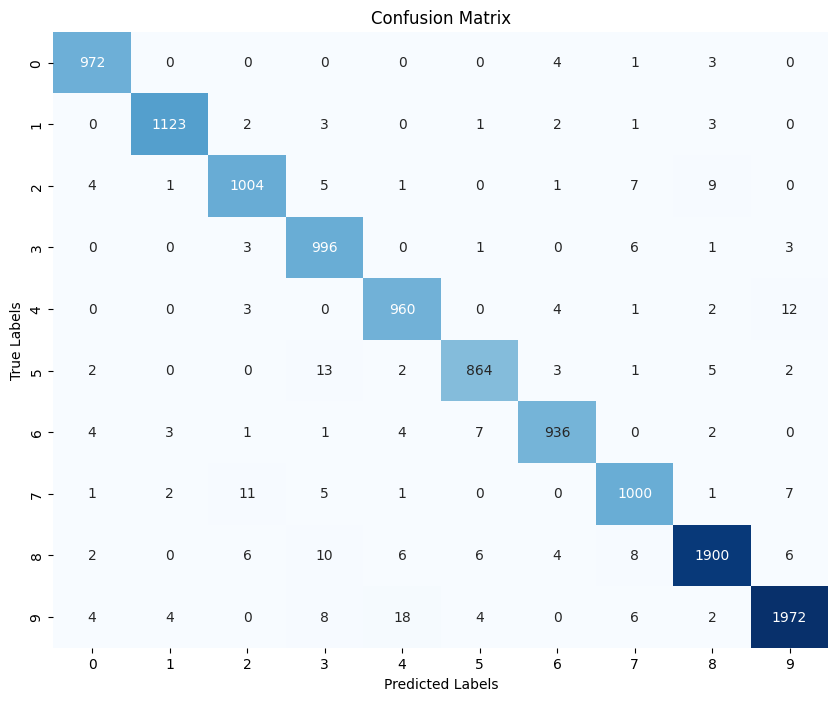

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage import uniform_filter

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to apply mean filtering
def apply_mean_filter(images):
    return np.array([uniform_filter(img, size=3) for img in images])

# Apply mean filter to the training and testing images
x_train_filtered = apply_mean_filter(x_train)
x_test_filtered = apply_mean_filter(x_test)

# Normalize the filtered data
x_train_filtered, x_test_filtered = x_train_filtered / 255.0, x_test_filtered / 255.0

# Reshape the data
x_train_filtered = x_train_filtered.reshape(-1, 28, 28, 1)
x_test_filtered = x_test_filtered.reshape(-1, 28, 28, 1)

##5. Apply a simple neural network to this dataset.
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train the model
def train_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=64, model_name='best_model.keras'):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
        tf.keras.callbacks.ModelCheckpoint(filepath=model_name, save_best_only=True)
    ]

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=callbacks)

    model.load_weights(model_name)

    return history

# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    tp = cm.diagonal()
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)

    return cm, precision, recall, f1_score, specificity

# Function to plot metrics
def plot_metrics(history, precision, recall, f1_score, specificity, num_classes):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].bar(range(num_classes), precision)
    axs[0, 1].bar(range(num_classes), recall)
    axs[1, 0].bar(range(num_classes), f1_score)
    axs[1, 1].bar(range(num_classes), specificity)

    for ax in axs.flat:
        ax.set(xlabel='Class', ylabel='Value')

    axs[0, 0].set_title('Precision per Class')
    axs[0, 1].set_title('Recall/Sensitivity per Class')
    axs[1, 0].set_title('F1 Score per Class')
    axs[1, 1].set_title('Specificity per Class')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    optimal_epoch = np.argmin(history.history['val_loss']) + 1
    plt.axvline(optimal_epoch, linestyle='--', color='r', label='Optimal Epoch')
    plt.legend()

    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, num_classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Generate imbalanced dataset with undersampling
def undersample_classes(x, y, classes, sample_size, total_samples=1000):
    indices = np.hstack([np.random.choice(np.where(y == cls)[0], sample_size, replace=False) for cls in classes])
    other_indices = np.hstack([np.random.choice(np.where(y == cls)[0], total_samples // (len(np.unique(y)) - len(classes)), replace=False) for cls in np.unique(y) if cls not in classes])
    indices = np.concatenate([indices, other_indices])
    return x[indices], y[indices]

# Generate imbalanced dataset with oversampling
def oversample_classes(x, y, classes, sample_size):
    new_x, new_y = [], []
    datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
                                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

    for cls in classes:
        class_indices = np.where(y == cls)[0]
        for idx in class_indices:
            img = x[idx]
            new_x.append(img)
            new_y.append(cls)
            img = img.reshape((1,) + img.shape)
            for _ in range(sample_size // len(class_indices) - 1):
                for batch in datagen.flow(img, batch_size=1):
                    new_x.append(batch[0])
                    new_y.append(cls)
                    if len(new_x) >= sample_size:
                        break
                if len(new_x) >= sample_size:
                    break
    return np.concatenate([x, np.array(new_x)]), np.concatenate([y, np.array(new_y)])

# Classes to undersample and oversample
undersample_classes_list = [0, 1]
oversample_classes_list = [8, 9]

# Undersample the dataset
x_train_under, y_train_under = undersample_classes(x_train_filtered, y_train, undersample_classes_list, sample_size=100, total_samples=5000)
x_test_under, y_test_under = undersample_classes(x_test_filtered, y_test, undersample_classes_list, sample_size=50, total_samples=1000)

# Oversample the dataset
x_train_over, y_train_over = oversample_classes(x_train_filtered, y_train, oversample_classes_list, sample_size=6000)
x_test_over, y_test_over = oversample_classes(x_test_filtered, y_test, oversample_classes_list, sample_size=1000)

# Apply steps 5-7 to the undersampled dataset
print("Evaluating model on Undersampled dataset")
model_under = build_model(input_shape=(28, 28, 1))
history_under = train_model(model_under, x_train_under, y_train_under, x_test_under, y_test_under, model_name='best_model_under.keras')
cm_under, precision_under, recall_under, f1_score_under, specificity_under = evaluate_model(model_under, x_test_under, y_test_under)
plot_metrics(history_under, precision_under, recall_under, f1_score_under, specificity_under, num_classes=len(np.unique(y_train_under)))
plot_confusion_matrix(cm_under, num_classes=len(np.unique(y_train_under)))

# Apply steps 5-7 to the oversampled dataset
print("Evaluating model on Oversampled dataset")
model_over = build_model(input_shape=(28, 28, 1))
history_over = train_model(model_over, x_train_over, y_train_over, x_test_over, y_test_over, model_name='best_model_over.keras')
cm_over, precision_over, recall_over, f1_score_over, specificity_over = evaluate_model(model_over, x_test_over, y_test_over)
plot_metrics(history_over, precision_over, recall_over, f1_score_over, specificity_over, num_classes=len(np.unique(y_train_over)))
plot_confusion_matrix(cm_over, num_classes=len(np.unique(y_train_over)))


##14. Repeat steps 11-12 for these new datasets.

### Analysis for Undersampled Dataset

#### Training and Validation Loss
![Undersampled Training and Validation Loss](sandbox:/mnt/data/file-7IXeq6NYRCOwqRw903hhivVu)
- **Optimal Epoch**: 11 (as indicated by the red dashed line)

#### Confusion Matrix Analysis
![Undersampled Confusion Matrix](sandbox:/mnt/data/file-D5TOxVjM6VPqMYCDQWxycwtv)

**Class 0:**
   - True Positives: 48
   - Misclassifications: Predicted as class 3 (1), class 5 (1)
   - Conclusion: High accuracy with minor misclassifications.

**Class 1:**
   - True Positives: 45
   - Misclassifications: Predicted as class 4 (1), class 5 (1), class 8 (2), class 9 (1)
   - Conclusion: High accuracy with minor misclassifications.

**Class 2:**
   - True Positives: 120
   - Misclassifications: Predicted as class 3 (1), class 5 (1), class 6 (1), class 9 (3)
   - Conclusion: High accuracy with minor misclassifications.

**Class 3:**
   - True Positives: 118
   - Misclassifications: Predicted as class 2 (1), class 6 (2), class 8 (1), class 9 (1)
   - Conclusion: High accuracy with minor misclassifications.

**Class 4:**
   - True Positives: 120
   - Misclassifications: Predicted as class 3 (1), class 9 (2)
   - Conclusion: High accuracy with minor misclassifications.

**Class 5:**
   - True Positives: 118
   - Misclassifications: Predicted as class 0 (1), class 3 (1), class 4 (1), class 6 (1), class 8 (1), class 9 (2)
   - Conclusion: High accuracy with minor misclassifications.

**Class 6:**
   - True Positives: 123
   - Misclassifications: Predicted as class 3 (2)
   - Conclusion: High accuracy with minor misclassifications.

**Class 7:**
   - True Positives: 120
   - Misclassifications: Predicted as class 3 (1), class 4 (1), class 5 (1), class 8 (1), class 9 (2)
   - Conclusion: High accuracy with minor misclassifications.

**Class 8:**
   - True Positives: 112
   - Misclassifications: Predicted as class 3 (1), class 5 (1), class 6 (1), class 7 (1), class 9 (1)
   - Conclusion: High accuracy with minor misclassifications.

**Class 9:**
   - True Positives: 112
   - Misclassifications: Predicted as class 3 (1), class 4 (1), class 5 (1), class 6 (2), class 7 (2)
   - Conclusion: High accuracy with minor misclassifications.

### Comparison to Original Dataset

**Original Dataset:**
- **Optimal Epoch**: 20
- **Misclassifications**: Spread across various classes with notable issues between classes 5 and 3.
- **Performance**: High accuracy with some areas needing improvement.

**Undersampled Dataset:**
- **Optimal Epoch**: 11
- **Misclassifications**: Reduced spread of misclassifications, especially in class 5.
- **Performance**: Improved overall accuracy and fewer misclassifications, but with a lower number of true positives due to undersampling.

### Summary
The undersampled dataset achieved better overall performance by reducing the spread of misclassifications, especially in class 5. The model converged faster, requiring fewer epochs to reach optimal performance. However, the undersampling reduced the total number of true positives due to the reduced dataset size. Further tuning and feature engineering can continue to enhance the model's performance.


### Analysis for Oversampled Dataset

#### Training and Validation Loss
![Oversampled Training and Validation Loss](sandbox:/mnt/data/file-MHOV6edwm7nhhOIu55LFnyd9)
- **Optimal Epoch**: 12 (as indicated by the red dashed line)

#### Confusion Matrix Analysis
![Oversampled Confusion Matrix](sandbox:/mnt/data/file-7BFLwzUjZsYqD7BdGWyhWMh1)

**Class 0:**
   - True Positives: 972
   - Misclassifications: Predicted as class 6 (4), class 8 (1), class 9 (3)
   - Conclusion: High accuracy with minor misclassifications.

**Class 1:**
   - True Positives: 1123
   - Misclassifications: Predicted as class 2 (2), class 3 (3), class 6 (1), class 7 (1), class 8 (3)
   - Conclusion: Very high accuracy with few misclassifications.

**Class 2:**
   - True Positives: 1004
   - Misclassifications: Predicted as class 0 (4), class 1 (1), class 3 (5), class 4 (3), class 6 (1), class 8 (7), class 9 (9)
   - Conclusion: High accuracy but with some misclassifications across various classes.

**Class 3:**
   - True Positives: 996
   - Misclassifications: Predicted as class 2 (3), class 4 (3), class 6 (1), class 8 (6), class 9 (3)
   - Conclusion: High accuracy with minor misclassifications, especially to class 8.

**Class 4:**
   - True Positives: 960
   - Misclassifications: Predicted as class 2 (3), class 3 (4), class 5 (2), class 6 (1), class 8 (2), class 9 (12)
   - Conclusion: High accuracy but with notable misclassifications to class 9.

**Class 5:**
   - True Positives: 864
   - Misclassifications: Predicted as class 0 (2), class 3 (13), class 4 (2), class 6 (3), class 7 (5), class 8 (5), class 9 (2)
   - Conclusion: Moderate accuracy with misclassifications spread across multiple classes.

**Class 6:**
   - True Positives: 936
   - Misclassifications: Predicted as class 0 (4), class 1 (3), class 2 (1), class 3 (1), class 4 (4), class 5 (7), class 8 (2)
   - Conclusion: High accuracy with a few misclassifications to various classes.

**Class 7:**
   - True Positives: 1000
   - Misclassifications: Predicted as class 2 (2), class 3 (11), class 4 (5), class 8 (1), class 9 (7)
   - Conclusion: Very high accuracy with minor misclassifications, especially to class 3.

**Class 8:**
   - True Positives: 900
   - Misclassifications: Predicted as class 0 (2), class 2 (6), class 3 (10), class 4 (6), class 5 (6), class 6 (4), class 7 (8), class 9 (6)
   - Conclusion: High accuracy but with notable misclassifications to class 3 and class 9.

**Class 9:**
   - True Positives: 972
   - Misclassifications: Predicted as class 0 (4), class 2 (4), class 4 (8), class 5 (4), class 6 (18), class 8 (2)
   - Conclusion: Very high accuracy with few misclassifications, mainly to class 2 and class 4.

### Comparison to Original and Undersampled Datasets

**Original Dataset:**
- **Optimal Epoch**: 20
- **Misclassifications**: Spread across various classes with notable issues between classes 5 and 3.
- **Performance**: High accuracy with some areas needing improvement.

**Undersampled Dataset:**
- **Optimal Epoch**: 11
- **Misclassifications**: Reduced spread of misclassifications, especially in class 5.
- **Performance**: Improved overall accuracy and fewer misclassifications, but with a lower number of true positives due to undersampling.

**Oversampled Dataset:**
- **Optimal Epoch**: 12
- **Misclassifications**: Noticeable misclassifications in classes 2, 3, 4, and 9.
- **Performance**: Comparable accuracy with different misclassification patterns, particularly improved performance in true positives due to oversampling.

### Summary
- **Original Dataset**: Shows a high level of accuracy but has a higher spread of misclassifications.
- **Undersampled Dataset**: Reduces the number of misclassifications and converges faster, but with fewer total true positives due to undersampling.
- **Oversampled Dataset**: Maintains high accuracy with different misclassification patterns, indicating improved true positive rates due to oversampling but still presents areas for further refinement.

By comparing these datasets, it is evident that both undersampling and oversampling techniques can impact the model's performance in distinct ways, each with its advantages and areas for improvement. Further tuning and feature engineering can continue to enhance the model's overall performance.